In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN

In [27]:
movies = [i for i in range(0,401)]
df = pd.read_csv(r'movieReplicationSet-2.csv', usecols=movies)
popularity = df.count() # popularity found by total ratings
popularity

The Life of David Gale (2003)                  76
Wing Commander (1999)                          71
Django Unchained (2012)                       453
Alien (1979)                                  289
Indiana Jones and the Last Crusade (1989)     463
                                             ... 
Anaconda (1997)                               198
Twister (1996)                                174
MacArthur (1977)                               61
Look Who's Talking (1989)                     108
I enjoy driving fast                         1094
Length: 401, dtype: int64

In [28]:
popularity_df = popularity.to_frame(name='counts')
popularity_df

,counts
The Life of David Gale (2003),76
Wing Commander (1999),71
Django Unchained (2012),453
Alien (1979),289
Indiana Jones and the Last Crusade (1989),463
...,...
Anaconda (1997),198
Twister (1996),174
MacArthur (1977),61
Look Who's Talking (1989),108


In [29]:
ratings = df.mean().to_frame(name='avgRating')
ratings

,avgRating
The Life of David Gale (2003),2.151316
Wing Commander (1999),2.021127
Django Unchained (2012),3.153422
Alien (1979),2.707612
Indiana Jones and the Last Crusade (1989),2.778618
...,...
Anaconda (1997),2.295455
Twister (1996),2.402299
MacArthur (1977),2.114754
Look Who's Talking (1989),2.337963


In [41]:
popularity_df.median()

counts    198.0
dtype: float64

In [32]:
lessPopular = popularity_df[popularity_df['counts'] < 198]
lessPopular

,counts
The Life of David Gale (2003),76
Wing Commander (1999),71
Snatch (2000),128
Rambo: First Blood Part II,182
Let the Right One In (2008),137
...,...
The Usual Suspects (1995),193
Patton (1970),61
Twister (1996),174
MacArthur (1977),61


In [33]:
morePopular = popularity_df[popularity_df['counts'] >= 198]
morePopular

,counts
Django Unchained (2012),453
Alien (1979),289
Indiana Jones and the Last Crusade (1989),463
Fargo (1996),254
Black Swan (2010),588
...,...
The Mask (1994),398
Jaws (1975),496
Harry Potter and the Chamber of Secrets (2002),846
Anaconda (1997),198


In [34]:
morePopular_movies = list(morePopular.index.values)
morePopular_movies

['Django Unchained (2012)',
 'Alien (1979)',
 'Indiana Jones and the Last Crusade (1989)',
 'Fargo (1996)',
 'Black Swan (2010)',
 'King Kong (1976)',
 'A Nightmare on Elm Street (1984)',
 'The Fast and the Furious (2001)',
 'American Beauty (1999)',
 'Psycho (1960)',
 'Terminator 3: Rise of the Machines (2003)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'The Silence of the Lambs (1991)',
 'Minority Report (2002)',
 "Schindler's List (1993)",
 'The Karate Kid Part II (1986)',
 'Planet of the Apes (2001)',
 'The Godfather: Part II (1974)',
 'Indiana Jones and the Temple of Doom (1984)',
 'Raiders of the Lost Ark (1981)',
 'The Iron Giant (1999)',
 'The Matrix Revolutions (2003)',
 'The Lost World: Jurassic Park (1997)',
 'The Texas Chainsaw Massacre (1974)',
 'Taxi Driver (1976)',
 'Back to the Future (1985)',
 '13 Going on 30 (2004)',
 'Billy Madison (1995)',
 'Batman & Robin (1997)',
 'Jurassic Park III (2001)',
 'Mission: Impossible II (2000)',
 'Lost in Translation (2003)',
 'S

In [10]:
lessPopular_movies = list(lessPopular.index.values)
lessPopular_movies

['The Life of David Gale (2003)',
 'Wing Commander (1999)',
 'Snatch (2000)',
 'Rambo: First Blood Part II',
 'Let the Right One In (2008)',
 'The Machinist (2004)',
 'Brazil (1985)',
 'Change of Habit (1969)',
 'Night of the Living Dead (1968)',
 'Man on Fire (2004)',
 'The Others (2001)',
 'Sling Blade (1996)',
 '3000 Miles to Graceland (2001)',
 'Magnolia (1999)',
 'North (1994)',
 'Sorority Boys (2002)',
 'The Bridges of Madison County (1995)',
 'Chain Reaction (1996)',
 'Platoon (1986)',
 'Signs (2002)',
 'Terms of Endearment (1983)',
 'The Omen (1976)',
 'Just Like Heaven (2005)',
 'Showgirls (1995)',
 'Diamonds are Forever (1971)',
 'Crossroads (2002)',
 'Pieces of April (2003)',
 'Torque (2004)',
 'Fear and Loathing in Las Vegas (1998)',
 'Barbarella (1968)',
 'The King of Marvin Gardens (1972)',
 'The Poseidon Adventure (1972)',
 'The Rock (1996)',
 'Love Story (1970)',
 'Gone in Sixty Seconds (2000)',
 'Funny Girl (1968)',
 'Honey (2003)',
 'Blues Brothers 2000 (1998)',
 'Sla

In [11]:
# for more popular
movies = [i for i in range(0,401)]
df = pd.read_csv(r'movieReplicationSet-2.csv', usecols=movies)
morePop = df[morePopular_movies]
morePop

,Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Fargo (1996),Black Swan (2010),King Kong (1976),A Nightmare on Elm Street (1984),The Fast and the Furious (2001),American Beauty (1999),Psycho (1960),...,Groundhog Day (1993),Gladiator (2000),The Mummy (1999),Harry Potter and the Goblet of Fire (2005),X-Men 2 (2003),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Anaconda (1997),I enjoy driving fast
0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,3.5,...,NaN,NaN,NaN,0.0,NaN,NaN,4.0,0.5,NaN,5.0
1,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.5,NaN,4.0
3,2.0,NaN,3.0,NaN,4.0,NaN,NaN,NaN,3.5,NaN,...,NaN,NaN,NaN,2.5,NaN,NaN,NaN,2.5,NaN,5.0
4,3.5,NaN,0.5,1.0,0.0,0.0,NaN,2.5,NaN,NaN,...,2.0,NaN,1.0,NaN,2.5,3.0,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,...,3.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,2.0
1093,NaN,NaN,4.0,NaN,3.5,3.5,3.5,4.0,NaN,4.0,...,4.0,NaN,4.0,3.5,4.0,4.0,3.5,3.5,3.5,3.0
1094,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,2.5,2.0,...,NaN,3.5,NaN,3.0,NaN,NaN,NaN,4.0,NaN,4.0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.5,NaN,3.0


In [12]:
morePopMean = morePop.mean().mean()
morePopMean # avg rating for more popular movies

2.8708037740574213

In [13]:
# for less popular
movies = [i for i in range(0,401)]
df = pd.read_csv(r'movieReplicationSet-2.csv', usecols=movies)
lessPop = df[lessPopular_movies]
lessPop

,The Life of David Gale (2003),Wing Commander (1999),Snatch (2000),Rambo: First Blood Part II,Let the Right One In (2008),The Machinist (2004),Brazil (1985),Change of Habit (1969),Night of the Living Dead (1968),Man on Fire (2004),...,On Golden Pond (1981),The Descent (2005),Runaway Bride (1999),Gods and Generals (2003),My Father and My Son (2005),The Usual Suspects (1995),Patton (1970),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,4.0,2.5,3.5,NaN,3.5,3.5,3.5,4.0,...,4.0,3.0,3.5,4.0,3.5,NaN,4.0,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
lessPopMean = lessPop.mean().mean()
lessPopMean # average rating for less popular

2.4009228451306637

In [42]:
# use t test
from scipy.stats import ttest_ind

ttest_ind(lessPop.mean(), morePop.mean())


Ttest_indResult(statistic=-17.815058197488437, pvalue=1.1749930392848685e-52)

In [17]:
ttest_ind(lessPop, morePop) #confirms this doesn't work since t-test compares the mean of each array but in this case finding a mean will result in all movie means

ValueError: operands could not be broadcast together with shapes (200,) (201,) 

In [43]:
x = popularity_df.values.reshape(-1,)

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(popularity_df, ratings['avgRating'])

LinearRegression()

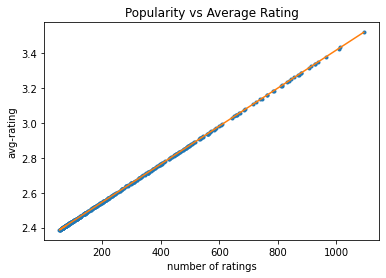

In [45]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt


y = reg.intercept_ + reg.coef_[0]*popularity_df


# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.xlabel('number of ratings')
plt.ylabel("avg-rating")
plt.title('Popularity vs Average Rating')
plt.show()